# E20- Neural Networks in Keras 

Use keras framework to solve the below exercises.


In [60]:
import numpy as np
#import keras 
import pandas as pd
import matplotlib.pyplot as plt

## 20.1 Predicting Student Admissions with Neural Networks

In this notebook, we predict student admissions to graduate schools based on six pieces of data:

1. GRE Scores (Test)
2. TOEFL Scores (Test)
3. University Ranking (1-5)
4. Statement of Purpose (SOP) and Letter of Recommendation Strength ( out of 5 )
5. Undergraduate GPA Scores (Grades)
6. Research Experience ( either 0 or 1 )

**Exercise:** Design and train a shallow neural network to predict the chance of Admission for each entry. Choose the number of hidden layer and neurons that minimizes the error. 

In [115]:
# Import dataset
data1 = pd.read_csv('https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/datasets/universityGraduateAdmissions.csv', index_col=0)
data1.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [49]:
data1.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [116]:

X = data.drop(data.columns[-1], axis=1)
Y = pd.DataFrame(data[data.columns[-1]])
#Y = pd.DataFrame(np.array(data1.target), columns=['Chance of Admit'])

In [95]:
Y

Serial No.
1      0.92
2      0.76
3      0.72
4      0.80
5      0.65
6      0.90
7      0.75
8      0.68
9      0.50
10     0.45
11     0.52
12     0.84
13     0.78
14     0.62
15     0.61
16     0.54
17     0.66
18     0.65
19     0.63
20     0.62
21     0.64
22     0.70
23     0.94
24     0.95
25     0.97
26     0.94
27     0.76
28     0.44
29     0.46
30     0.54
       ... 
471    0.87
472    0.64
473    0.90
474    0.67
475    0.67
476    0.59
477    0.62
478    0.65
479    0.71
480    0.79
481    0.80
482    0.78
483    0.83
484    0.71
485    0.73
486    0.70
487    0.68
488    0.79
489    0.76
490    0.65
491    0.67
492    0.54
493    0.53
494    0.62
495    0.68
496    0.87
497    0.96
498    0.93
499    0.73
500    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [64]:
# Split datasets.
X_train, X_test , Y_train, Y_test = train_test_split(X,Y, test_size=0.3 ,random_state=22)

# Normalize Data
from sklearn.preprocessing import StandardScaler

# Define the Preprocessing Method and Fit Training Data to it
scaler = StandardScaler()
scaler.fit(X)

# Make X_train to be the Scaled Version of Data
# This process scales all the values in all 6 columns and replaces them with the new values
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

X_test = np.array(X_test)
Y_test = np.array(Y_test)

C:\Users\c_pal\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\c_pal\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  del sys.path[0]
C:\Users\c_pal\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [65]:
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [82]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from livelossplot import PlotLossesKeras
from keras import backend as K

In [66]:
from keras import backend as K

In [106]:
import matplotlib as pl

In [76]:

# As it is a regression problem the output is a neuron.
output_var = 1
print(output_var, ' output variables')

dims = X_train.shape[1]
print(dims, 'input variables')

1  output variables
7 input variables


In [70]:
dims

7

In [77]:
K.clear_session()
print("Building model...")

print('Model variables: ', dims)

model = Sequential()
model.add(Dense(output_var, input_shape=(dims,)))

print(model.summary())

model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(X_train, Y_train, verbose=2,epochs=15)

Building model...
Model variables:  7
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 8         
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________
None
Instructions for updating:
Use tf.cast instead.
Epoch 1/15
 - 0s - loss: 2.0532
Epoch 2/15
 - 0s - loss: 0.6895
Epoch 3/15
 - 0s - loss: 0.3998
Epoch 4/15
 - 0s - loss: 0.2812
Epoch 5/15
 - 0s - loss: 0.2084
Epoch 6/15
 - 0s - loss: 0.1595
Epoch 7/15
 - 0s - loss: 0.1240
Epoch 8/15
 - 0s - loss: 0.0988
Epoch 9/15
 - 0s - loss: 0.0805
Epoch 10/15
 - 0s - loss: 0.0666
Epoch 11/15
 - 0s - loss: 0.0560
Epoch 12/15
 - 0s - loss: 0.0477
Epoch 13/15
 - 0s - loss: 0.0412
Epoch 14/15
 - 0s - loss: 0.0359
Epoch 15/15
 - 0s - loss: 0.0316


In [79]:
# Parameters
learning_rate = 0.01
training_epochs = 150
display_step = 1

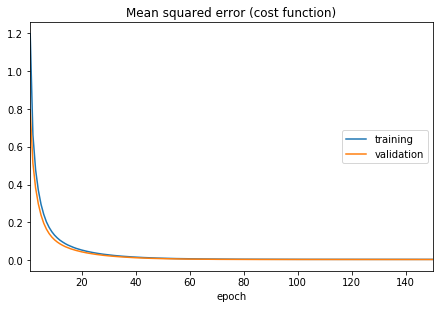

Mean squared error (cost function):
training   (min:    0.004, max:    1.198, cur:    0.004)
validation (min:    0.003, max:    0.793, cur:    0.003)


In [83]:
import keras.optimizers as opts

K.clear_session()
print("Building model...")

print('Model variables: ', dims)

model = Sequential()
model.add(Dense(output_var, input_shape=(dims,)))

op = opts.SGD(lr=learning_rate)

model.compile(loss = 'mean_squared_error',
              optimizer = op)

model.fit(X_train, Y_train,
          verbose=1, 
          epochs=150, 
          validation_data=[X_test,Y_test],
          callbacks=[PlotLossesKeras()])

# 20.2 Decision Boundary --  Moons Dataset 

**Exercise:** Use keras framework to find a decision boundary for point in the make_moons.

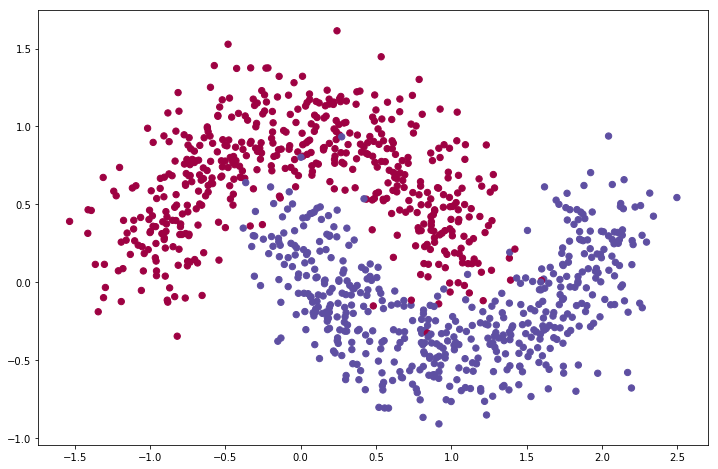

In [117]:
from keras.utils.np_utils import to_categorical
from sklearn.datasets.samples_generator import make_moons

x_train, y_train = make_moons(n_samples=1000, noise= 0.2, random_state=3)

plt.figure(figsize=(12, 8))
plt.scatter(x_train[:, 0], x_train[:,1], c=y_train, s=40, cmap=plt.cm.Spectral);

In [118]:
dims = x_train.shape[1]
print(dims, 'input variables')

2 input variables


In [119]:

from keras.models import Sequential
from keras.layers import Dense, Activation
from livelossplot import PlotLossesKeras
from keras import backend as K

**Hint:** Use the next function to plt the decision boundary,

In [120]:
K.clear_session()
print("Building model...")

print('Model variables: ', dims)

model = Sequential()
model.add(Dense(output_var, input_shape=(dims,)))

print(model.summary())

model.compile(optimizer='sgd', loss='mean_squared_error')
keras_model=model.fit(x_train, y_train, verbose=2,epochs=100)

Building model...
Model variables:  2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
 - 0s - loss: 1.2498
Epoch 2/100
 - 0s - loss: 0.3404
Epoch 3/100
 - 0s - loss: 0.1742
Epoch 4/100
 - 0s - loss: 0.1284
Epoch 5/100
 - 0s - loss: 0.1125
Epoch 6/100
 - 0s - loss: 0.1055
Epoch 7/100
 - 0s - loss: 0.1019
Epoch 8/100
 - 0s - loss: 0.0998
Epoch 9/100
 - 0s - loss: 0.0984
Epoch 10/100
 - 0s - loss: 0.0974
Epoch 11/100
 - 0s - loss: 0.0966
Epoch 12/100
 - 0s - loss: 0.0961
Epoch 13/100
 - 0s - loss: 0.0956
Epoch 14/100
 - 0s - loss: 0.0953
Epoch 15/100
 - 0s - loss: 0.0951
Epoch 16/100
 - 0s - loss: 0.0949
Epoch 17/100
 - 0s - loss: 0.0947
Epoch 18/100
 - 0s - loss: 0.0946
Epoch 19/100
 - 0s - loss: 0.0

In [121]:
def plot_decision_region(model, X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 30)
    y_vals = np.linspace(min_y, max_y, 30)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            '''
            Here 'model' is the neural network you previous trained.
            '''
            ZZ[i, j] = pred_fun(model, XX[i, j], YY[i, j])
    plt.contourf(XX, YY, ZZ, 30, cmap = pl.cm.coolwarm, vmin= 0, vmax=1)
    plt.colorbar()
    plt.xlabel("x")
    plt.ylabel("y")

In [122]:
def pred_fun(model,x1, x2):
    '''
    Here 'model' is the neural network you previous trained.
    '''
    xval = np.array([[x1, x2]])
    return model.predict(xval)[0, 0]

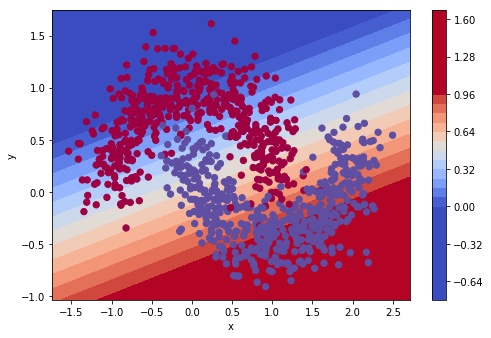

In [123]:
plt.figure(figsize = (8,16/3))    
'''
Here 'model' is the neural network you previous trained.
'''
plot_decision_region(model, x_train, pred_fun)
plt.scatter(x_train[:, 0], x_train[:,1], c=y_train, s=40, cmap=plt.cm.Spectral)
#plot_data(x_train, y_train)